<a href="https://colab.research.google.com/github/Pmilivojevic/Undistortion/blob/master/Undistortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prepare object points
nx = 7 # number of inside corners in x
ny = 7 # number of inside corners in y

In [ ]:
# Make a list of calibration images
fname = '/content/drive/My Drive/Colab Notebooks/sahovska_tabla.png'
img = cv2.imread(fname)

In [ ]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

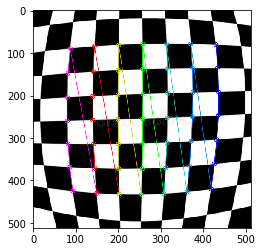

In [ ]:
# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

In [ ]:
print(corners)

[[[428.59537   81.26291 ]]

 [[433.41272  136.49918 ]]

 [[435.31775  191.63965 ]]

 [[434.53653  247.44498 ]]

 [[431.25916  303.73035 ]]

 [[425.48953  361.27588 ]]

 [[417.54266  420.20047 ]]

 [[370.42642   79.45854 ]]

 [[373.51297  136.49846 ]]

 [[374.67038  193.31813 ]]

 [[374.18994  250.15979 ]]

 [[371.3492   307.73947 ]]

 [[367.02435  366.4261  ]]

 [[360.87442  426.61636 ]]

 [[313.41068   78.804184]]

 [[315.26932  137.30707 ]]

 [[315.74323  194.8276  ]]

 [[315.18466  252.55194 ]]

 [[313.5912   310.65082 ]]

 [[310.81116  369.8538  ]]

 [[307.05295  430.80032 ]]

 [[257.08774   79.44385 ]]

 [[257.49307  138.59836 ]]

 [[257.51343  196.7677  ]]

 [[257.44934  254.53654 ]]

 [[256.63538  312.68674 ]]

 [[255.67612  371.7982  ]]

 [[254.49905  432.8218  ]]

 [[200.59232   81.50167 ]]

 [[199.67769  140.99524 ]]

 [[199.25728  198.8252  ]]

 [[199.31938  256.3366  ]]

 [[199.63193  313.8267  ]]

 [[200.61609  372.30237 ]]

 [[202.14946  432.32242 ]]

 [[144.21034   84.83

In [ ]:
'''dist_pickle = pickle.load( open( "/content/drive/My Drive/Colab Notebooks/wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]'''

objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

In [ ]:
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2) # x,y coordinates

In [ ]:
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)

In [ ]:
img= cv2.imread('/content/drive/My Drive/Colab Notebooks/Sofija.bmp')
img= img[70:442, 70:442]
img= cv2.resize(img, (512, 512), cv2.INTER_AREA)
img.shape

(512, 512, 3)

In [ ]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

In [ ]:
undistorted = cal_undistort(img, objpoints, imgpoints)

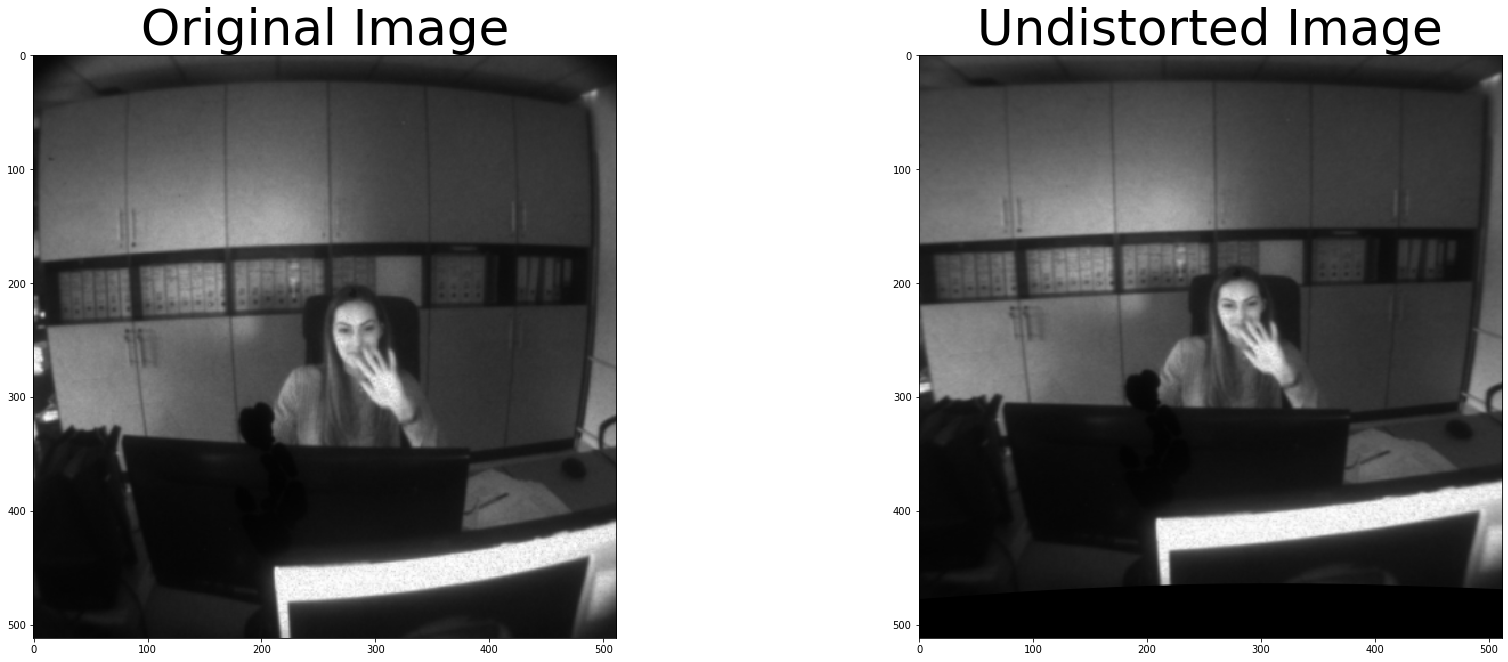

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)